<a href="https://colab.research.google.com/github/MaxSMCON/Group07/blob/main/Group_7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
!pip install xlrd -U

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
import re

# to make this notebook's output stable across runs
np.random.seed(10086)

def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced

from functools import wraps
import inspect
def initializer(func): #https://stackoverflow.com/questions/1389180/automatically-initialize-instance-variables
    names, varargs, keywords, defaults = inspect.getfullargspec(func)[:4]
    @wraps(func)
    def wrapper(self, *args, **kargs):
        for name, arg in list(zip(names[1:], args)) + list(kargs.items()):
            setattr(self, name, arg)

        for name, default in zip(reversed(names), reversed(defaults)):
            if not hasattr(self, name):
                setattr(self, name, default)

        func(self, *args, **kargs)
    return wrapper

In [ ]:
# !pip install pandas==1.2.0 --force
pd.__version__


'1.2.0'


# Import Data
---

https://github.com/MaxSMCON/Group07/blob/9a48e9f2ed68ff433cec599ccaac8e4715f0e953/Census%20Data%20Adula%20Over%2050K.xlsm

In [ ]:

url = "https://raw.githubusercontent.com/MaxSMCON/Group07/main/Census%20Data%20Adula%20Over%2050K.csv"
data = pd.read_csv(url,)
data

,Age,Work Class,fnlwgt: continuous.,Eduction,Education Number,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Wk,Native Country,Income Level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", skiprows=1, header=0, index_col=0)
# df

In [ ]:
df = data.copy()

Age                       73
Work Class                 9
fnlwgt: continuous.    21648
Eduction                  16
Education Number          16
Martial Status             7
Occupation                15
Relationship               6
Race                       5
Sex                        2
Capital Gain             119
Capital Loss              92
Hours Per Wk              94
Native Country            42
Income Level               2
dtype: int64

In [ ]:
df.dtypes

Age                     int64
Work Class             object
fnlwgt: continuous.     int64
Eduction               object
Education Number        int64
Martial Status         object
Occupation             object
Relationship           object
Race                   object
Sex                    object
Capital Gain            int64
Capital Loss            int64
Hours Per Wk            int64
Native Country         object
Income Level           object
dtype: object

In [64]:
df.groupby([ 'Sex', 'Race'])['Age'].agg({'mean', 'count'})

mean  count
Sex     Race                                 
 Female  Amer-Indian-Eskimo  37.117647    119
         Asian-Pac-Islander  35.089595    346
         Black               37.854019   1555
         Other               31.678899    109
         White               36.811618   8642
 Male    Amer-Indian-Eskimo  37.208333    192
         Asian-Pac-Islander  39.073593    693
         Black               37.682600   1569
         Other               34.654321    162
         White               39.652498  19174

In [ ]:
df.isnull().sum()

Age                    0
Work Class             0
fnlwgt: continuous.    0
Eduction               0
Education Number       0
Martial Status         0
Occupation             0
Relationship           0
Race                   0
Sex                    0
Capital Gain           0
Capital Loss           0
Hours Per Wk           0
Native Country         0
Income Level           0
dtype: int64

## Grouping features into cat, cont categories

In [ ]:
df.nunique()

Age                       73
Work Class                 9
fnlwgt: continuous.    21648
Eduction                  16
Education Number          16
Martial Status             7
Occupation                15
Relationship               6
Race                       5
Sex                        2
Capital Gain             119
Capital Loss              92
Hours Per Wk              94
Native Country            42
Income Level               2
dtype: int64

In [ ]:
df.columns

Index(['Age', 'Work Class', 'fnlwgt: continuous.', 'Eduction',
       'Education Number', 'Martial Status', 'Occupation', 'Relationship',
       'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours Per Wk ',
       'Native Country', 'Income Level '],
      dtype='object')

In [ ]:
target = ['Income Level']

contin_var = ["Age", 'fnlwgt: continuous.', 'Hours Per Wk ' ,'Capital Gain', 'Capital Loss', ]

cat_var= ["Work Class" , "Education Number", 'Education Number']

categ_string_var = ['Martial Status', 'Occupation', 'Relationship',
       'Race', 'Sex',]

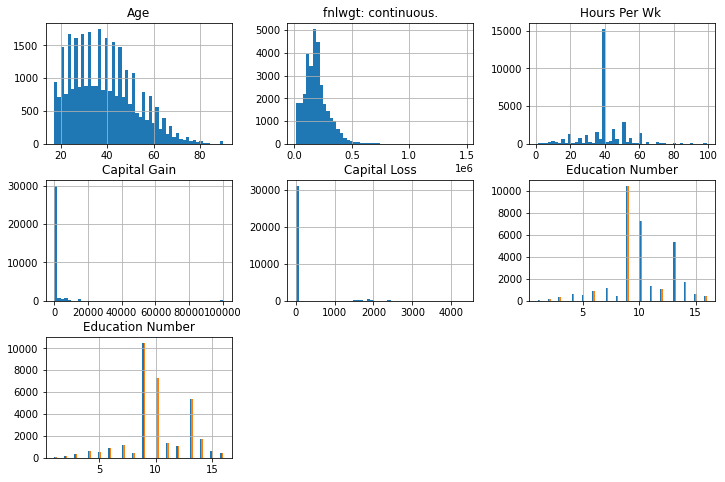

In [ ]:
df.loc[:, contin_var + cat_var + categ_string_var].hist(bins = 50, figsize=(12, 8))
plt.show()